## 章節 3：估計 (Estimation)

### 3.6 累積分佈函數（Cumulative Distribution Functions）

上一章節我們用迴圈過 pmf 中的數值跟機率來計算百分位。

如果我們要機算多個百分位，用累積分佈函數（Cdf）會比較有效率(因為每個百分位只要計算一次)。

Cdf 和 Pmf 對分佈所呈現的資訊量來說是一樣的，這兩個是可以互相轉換的。

Cdf 的好處是有效率的計算百分位。

thinkbayes.py 提供一個 Cdf 的類別來代表累積分佈函數。 Pmf 類別提供一個方法來產生對應的 Cdf。

<pre>
# 關於實例，請參考下一格的程式碼
cdf = suite.MakeCdf()  
interval = cdf.Percentile(5), cdf.Percentile(95)
</pre>

將 Pmf 轉換成 Cdf 的時間跟有多少數值成正比，len(pmf)。

作者的程式碼可以
The examples in this section are in http://thinkbayes.com/train3.py. For
more information see Section 0.3.

假設範圍 1 ~ 1000 在看到編號 [60, 30, 90] 後的期望值: 133.2752313750312


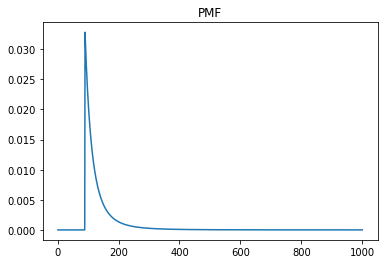

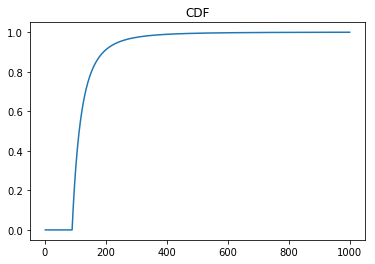

用 cdf.Percentile 方法產生的信賴區間 (91, 242)


In [16]:
from thinkbayes import Suite, Percentile
import matplotlib.pyplot as plt


class Train(Suite): # 將均勻分佈作為先驗分佈
    
    def Likelihood(self, data, hypo):
        if data > hypo:
            return 0.0

        return 1.0/hypo


class Train_PowerLaw(Train):
    
    def __init__(self, hypos, alpha=1.0):
        super().__init__()
        for hypo in hypos: # 將冪律分佈作為先驗分佈
            self.Set(hypo, hypo**-alpha)
            
        self.Normalize()
    

def expected_values(hypos, data):
    suite = Train_PowerLaw(hypos)
    for datum in data:
        suite.Update(datum)
        
    print("假設範圍", hypos[0], "~", hypos[-1], "在看到編號", data,"後的期望值:", suite.Mean())
    
    x, y = zip(*sorted(suite.Items()))
    plt.title("PMF")
    plt.plot(x, y)
    plt.show()
    
    cdf = suite.MakeCdf() # 產生 suite 對應的 Cdf
    plt.title("CDF")
    x, y = zip(*sorted(cdf.Items()))
    plt.plot(x, y)
    plt.show()
    
    interval = cdf.Percentile(5), cdf.Percentile(95) # 增加信賴區間90%的估計
    print("用 cdf.Percentile 方法產生的信賴區間", interval)

    
    
data = [60, 30, 90]
expected_values(range(1, 1001), data)